In [2]:
##This block is only for access of files using google drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#For accessing any file from google drive
downloaded = drive.CreateFile({'id':"1R9oboklxny8CPKI63DeAKC-A-mTpAegq"})   
downloaded.GetContentFile('SampleSuperstore.csv')

**Showing Dataset**

In [69]:
import pandas as pd
Filename= 'SampleSuperstore.csv'
df_sample= pd.read_csv('SampleSuperstore.csv',encoding= 'Latin-1')
df_sample.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


**Showing Null Values**

In [4]:
# Showing there is no null values in data
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


**Correlation Matrix** 

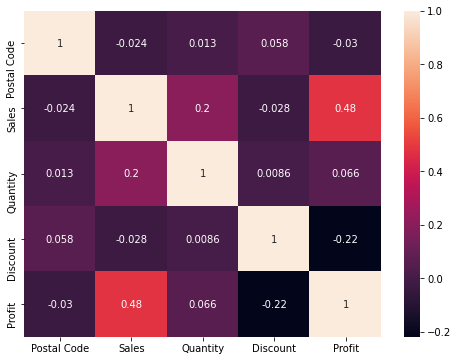

In [32]:
import seaborn as sn
import matplotlib.pyplot as plt
corr_Mat = df_sample.corr()
fig, ax = plt.subplots(figsize=(8,6))  
sn.heatmap(corr_Mat, annot=True, ax= ax)

Correlation matrix shows coorelation between two varibles. Here we can see that 

*   Profit and Sales are highly correlated. 
*   Country and Postal Code is negligibily correlated to profit. So we can drop it



In [25]:
# Dropping Postal Code and Country
df= df_sample.drop(['Country','Postal Code'], axis=1)
df.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


**Single Variate Analysis**

(array([1945.,    0.,    0., 5968.,    0.,    0., 1538.,    0.,    0.,
         543.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

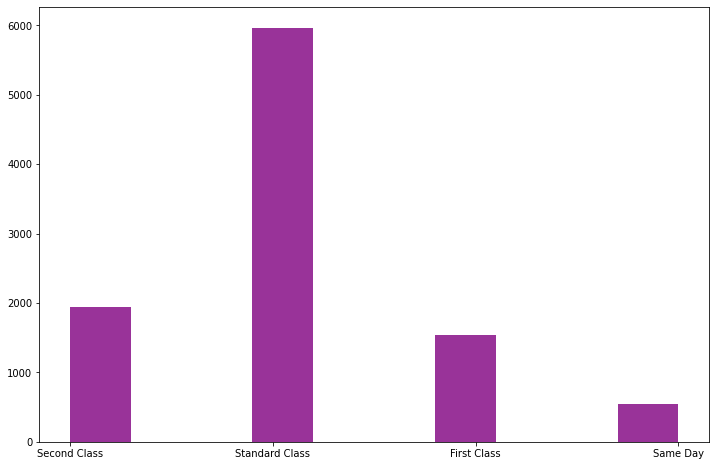

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.hist(df_sample['Ship Mode'],bins=10, color='purple', alpha=0.8, label='Value', linewidth=2)

(array([5191.,    0.,    0.,    0.,    0., 3020.,    0.,    0.,    0.,
        1783.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

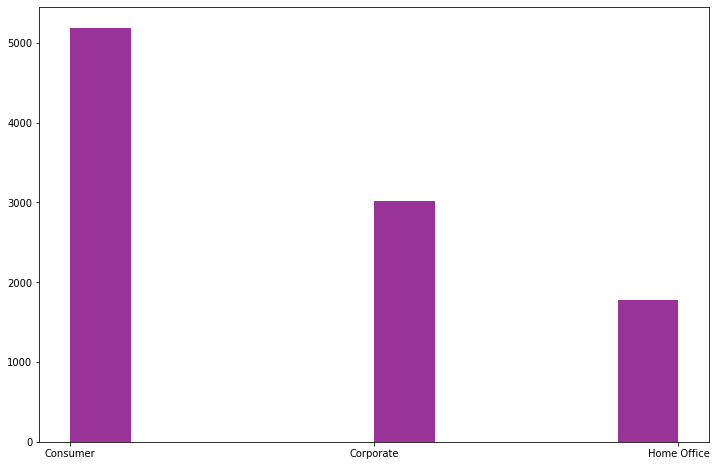

In [51]:
plt.figure(figsize=(12,8))
plt.hist(df_sample['Segment'],bins=10, color='purple', alpha=0.8, label='Value', linewidth=2)

(array([2121.,    0.,    0.,    0.,    0., 6026.,    0.,    0.,    0.,
        1847.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

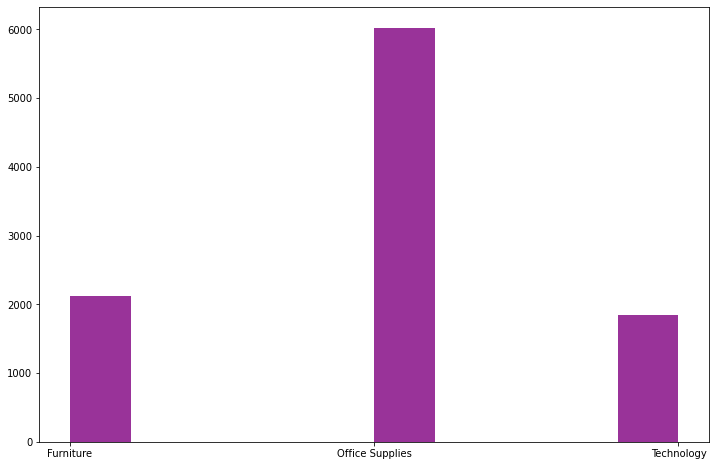

In [52]:
plt.figure(figsize=(12,8))
plt.hist(df_sample['Category'],bins=10, color='purple', alpha=0.8, label='Value', linewidth=2)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 <a list of 17 Text major ticklabel objects>)

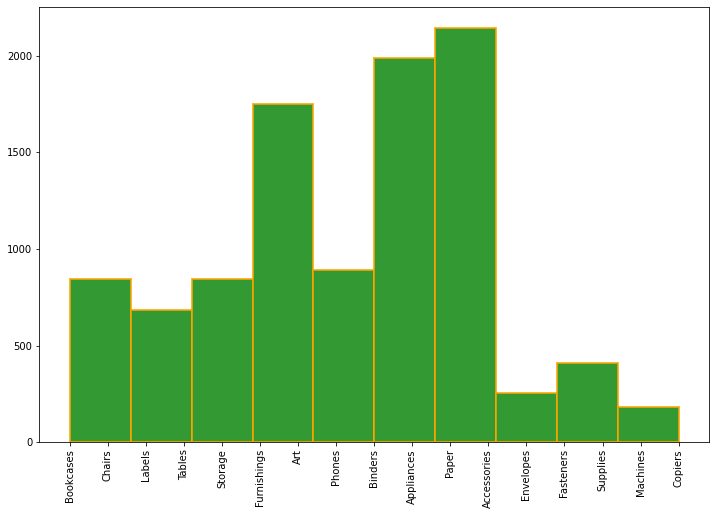

In [68]:
plt.figure(figsize=(12,8)) #change your figure size as per your desire here
n,bins,patch = plt.hist(df_sample['Sub-Category'],bins=10, color='green', alpha=0.8, label='Value', edgecolor='orange', linewidth=2)
plt.xticks(rotation=90)

([0, 1, 2, 3], <a list of 4 Text major ticklabel objects>)

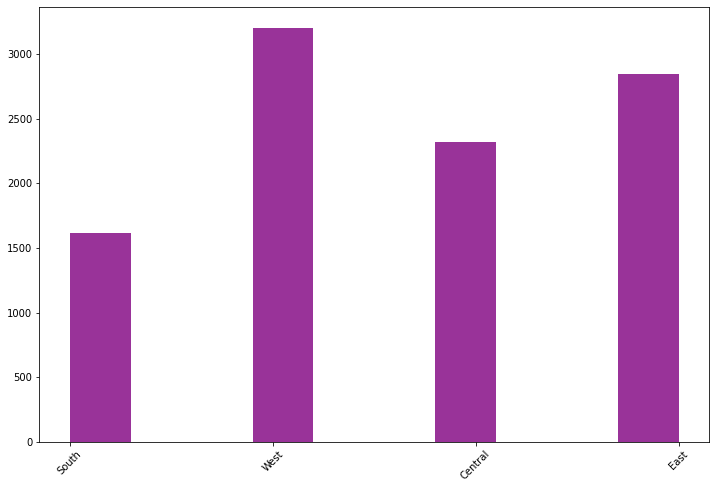

In [54]:
plt.figure(figsize=(12,8))
n,bins,patch = plt.hist(df_sample['Region'],bins=10, color='purple', alpha=0.8, label='Value', linewidth=2)
plt.xticks(rotation=45)

**Bivariate Analysis**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


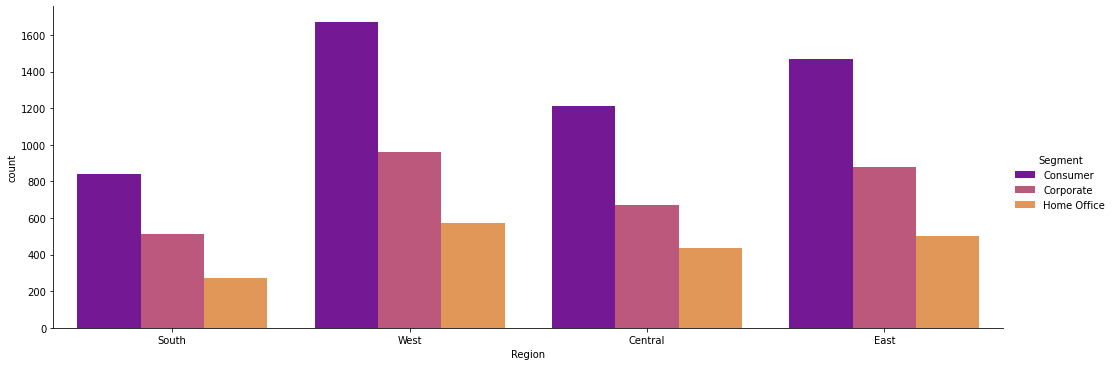

In [55]:
sn.catplot('Region',data= df_sample,hue='Segment',kind="count",aspect=2.8,palette="plasma")

Cosumer forms a major segment followed by Corporate and Home Office in all the regions

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


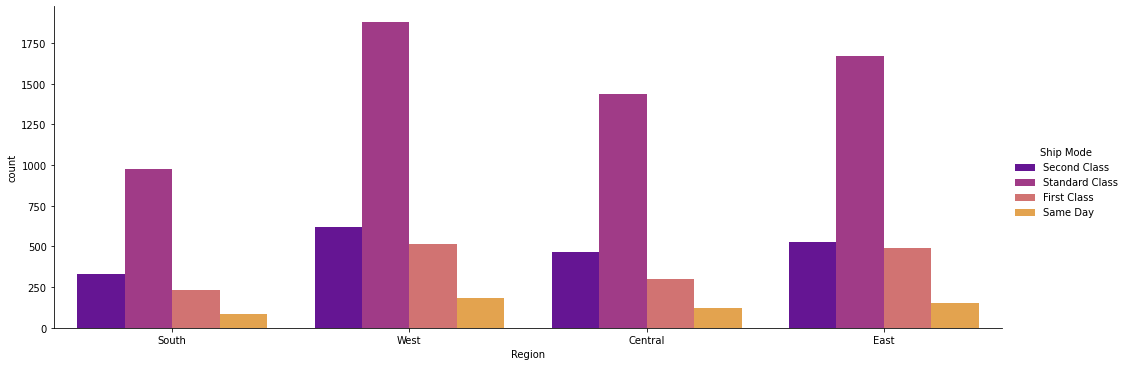

In [56]:
sn.catplot('Region',data= df_sample,hue='Ship Mode',kind="count",aspect=2.8,palette="plasma")

Standard Class forms major ship mode segment in all the regions

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


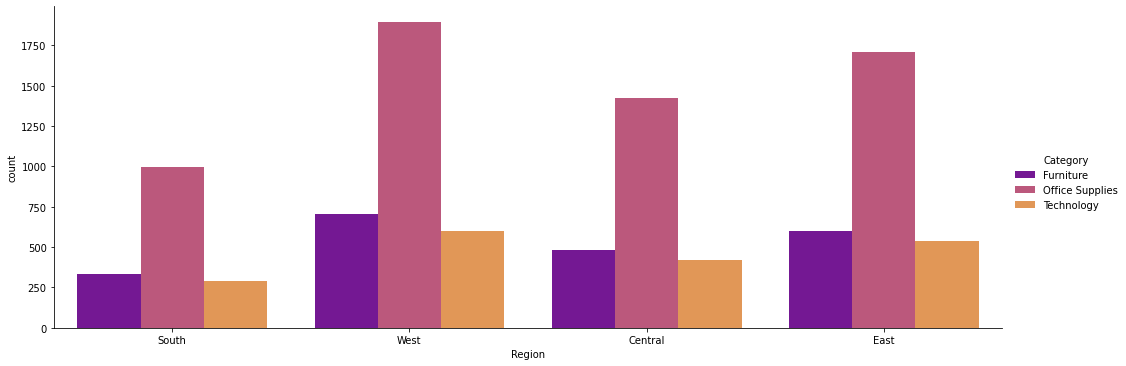

In [57]:
sn.catplot('Region',data= df_sample,hue='Category',kind="count",aspect=2.8,palette="plasma")

This shows office supplies are in demand 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


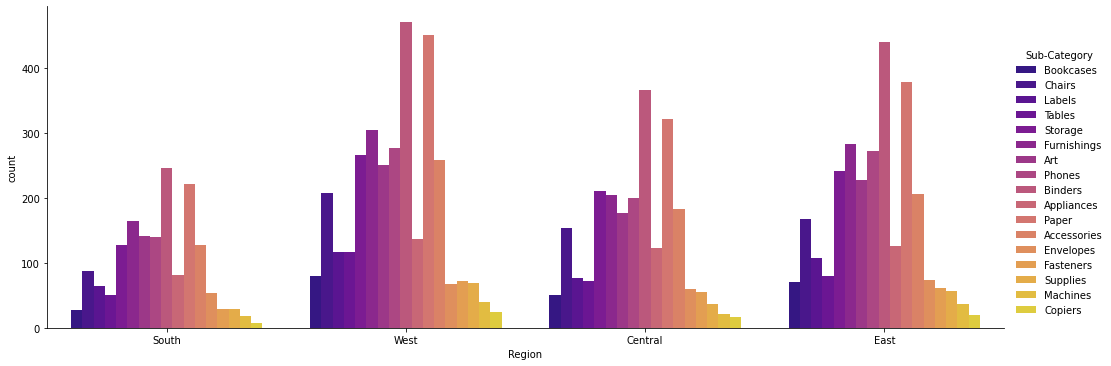

In [58]:
sn.catplot('Region',data= df_sample,hue='Sub-Category',kind="count",aspect=2.8,palette="plasma")

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


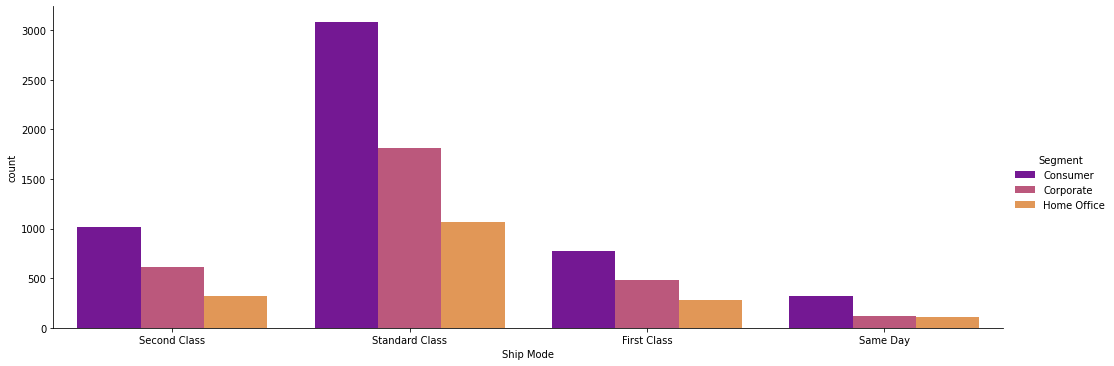

In [59]:
sn.catplot('Ship Mode',data= df_sample,hue='Segment',kind="count",aspect=2.8,palette="plasma")

**Multivariate Analysis**

In [13]:
Sort_region= df_sample.groupby('Region', as_index=False)['Profit','Sales','Discount','Quantity'].sum()
Sort_region.sort_values(['Profit'], axis=0,ascending= False)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Region,Profit,Sales,Discount,Quantity
3,West,108418.4489,725457.8245,350.20,12266
1,East,91522.7800,678781.2400,414.00,10618
2,South,46749.4303,391721.9050,238.55,6209
0,Central,39706.3625,501239.8908,558.34,8780


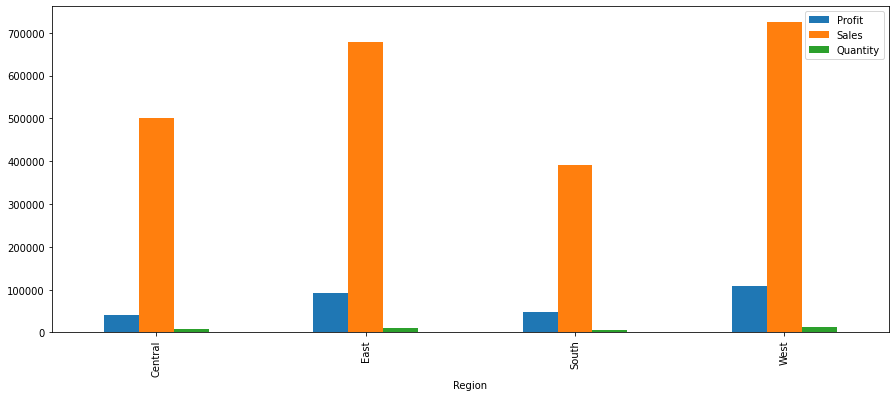

In [62]:
Sort_region.plot(x=	"Region", y=["Profit", "Sales", "Quantity"], kind="bar",figsize= (15,6))

In [15]:
Sort_mode= df_sample.groupby('Ship Mode', as_index=False)['Profit','Sales','Discount','Quantity'].sum()
Sort_mode.sort_values(['Profit'], axis=0,ascending= False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Ship Mode,Profit,Sales,Discount,Quantity
3,Standard Class,164088.7875,1.358216e+06,955.02,22797
2,Second Class,57446.6354,4.591936e+05,270.15,7423
0,First Class,48969.8399,3.514284e+05,253.17,5693
1,Same Day,15891.7589,1.283631e+05,82.75,1960


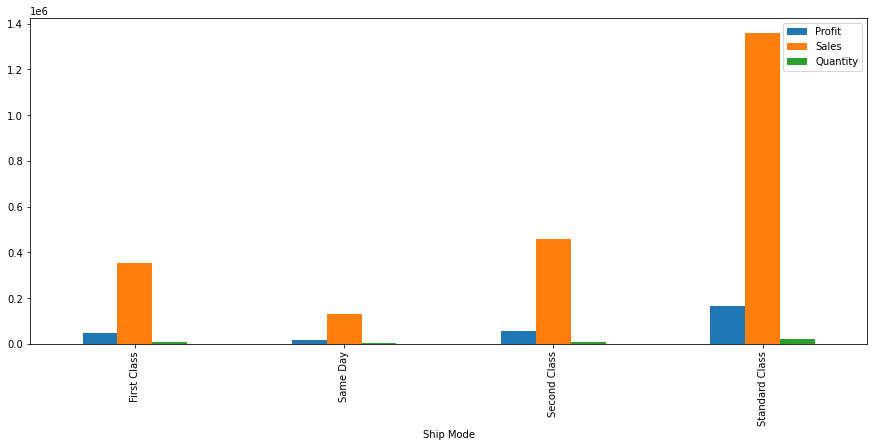

In [63]:
Sort_mode.plot(x=	"Ship Mode", y=["Profit", "Sales", "Quantity"], kind="bar",figsize= (15,6))

This shows using Standard Class Ship Mode is most profitable. But it should be observed that irrepective of less sales in First and Second Class, it is making comparatively good profit.
Thus Company should increase sales in First and Second class for more profit.

In [17]:
Sort_segment= df_sample.groupby('Segment', as_index=False)['Profit','Sales','Discount','Quantity'].sum()
Sort_segment.sort_values(['Profit'], axis=0,ascending= False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Segment,Profit,Sales,Discount,Quantity
0,Consumer,134119.2092,1.161401e+06,820.91,19521
1,Corporate,91979.1340,7.061464e+05,477.85,11608
2,Home Office,60298.6785,4.296531e+05,262.33,6744


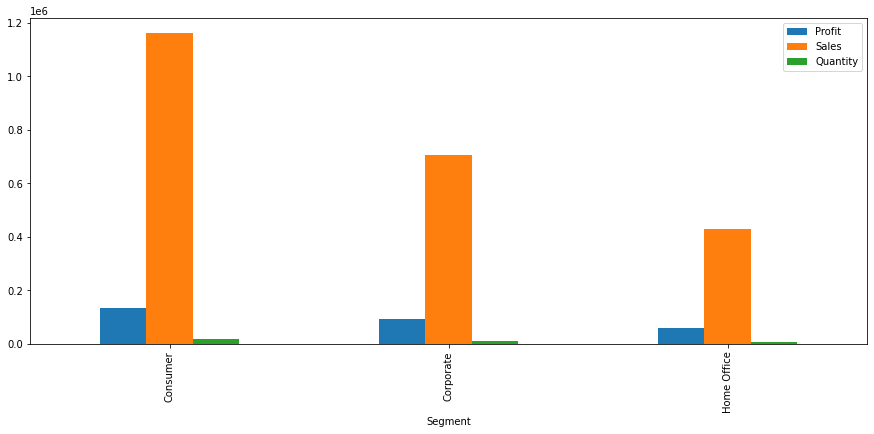

In [64]:
Sort_segment.plot(x=	"Segment", y=["Profit", "Sales", "Quantity"], kind="bar",figsize= (15,6))

This shows Consumer Class is most profitable. But it should be observed that irrepective of less sales in Corporate and Home Office, it is making comparatively good profit.
Thus Company should increase sales in Corporate and Home Office for more profit.

In [19]:
Sort_state= df_sample.groupby('State', as_index=False)['Profit','Sales','Discount','Quantity'].sum()
Sort_state.sort_values(['Profit'], axis=0,ascending= False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,State,Profit,Sales,Discount,Quantity
3,California,76381.3871,457687.6315,145.60,7667
30,New York,74038.5486,310876.2710,62.40,4224
45,Washington,33402.6517,138641.2700,32.40,1883
20,Michigan,24463.1876,76269.6140,1.80,946
44,Virginia,18597.9504,70636.7200,0.00,893
12,Indiana,18382.9363,53555.3600,0.00,578
9,Georgia,16250.0433,49095.8400,0.00,705
15,Kentucky,11199.6966,36591.7500,0.00,523
21,Minnesota,10823.1874,29863.1500,0.00,331
6,Delaware,9977.3748,27451.0690,0.60,367


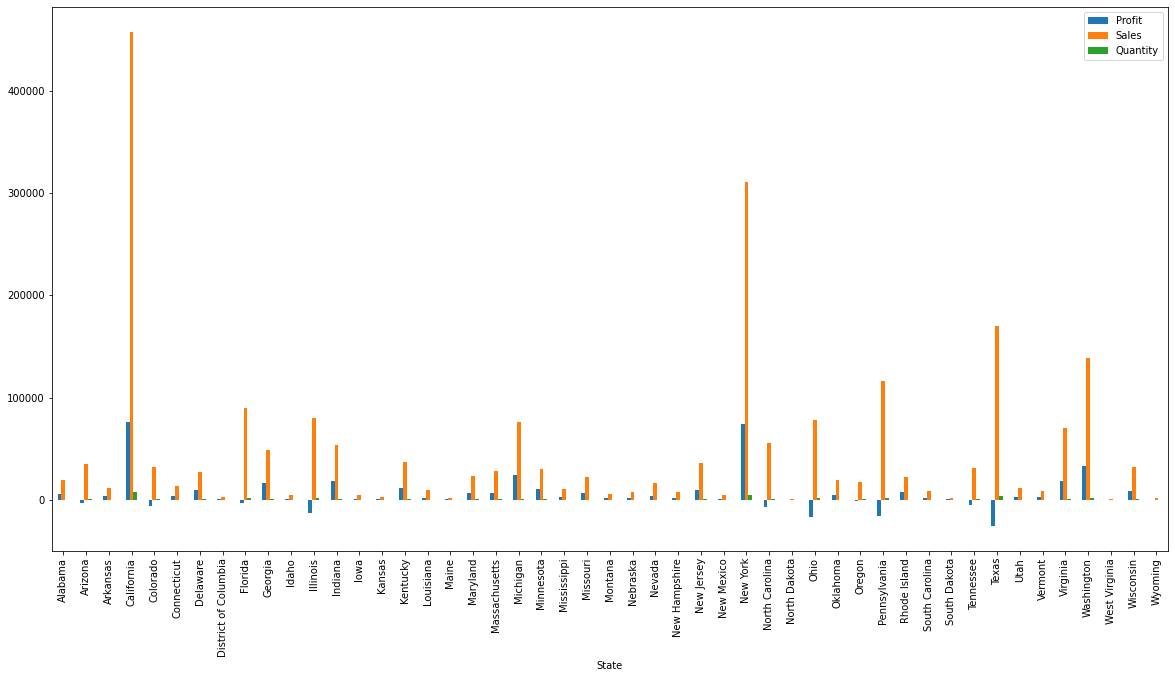

In [20]:
Sort_state.plot(x=	"State", y=["Profit", "Sales", "Quantity"], kind="bar",figsize= (20,10))



*   California and New York are giving highest profit.
*   But if sales increases in New York, it will give comapratively more profit.
*   Business in some cities are making loss irrespective of good discount. Company must improve their business strategy in those cities.






In [21]:
Sort_category= df_sample.groupby('Category', as_index=False)['Profit','Sales','Discount','Quantity'].sum()
Sort_category.sort_values(['Profit'], axis=0,ascending= False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Category,Profit,Sales,Discount,Quantity
2,Technology,145454.9481,836154.0330,244.40,6939
1,Office Supplies,122490.8008,719047.0320,947.80,22906
0,Furniture,18451.2728,741999.7953,368.89,8028


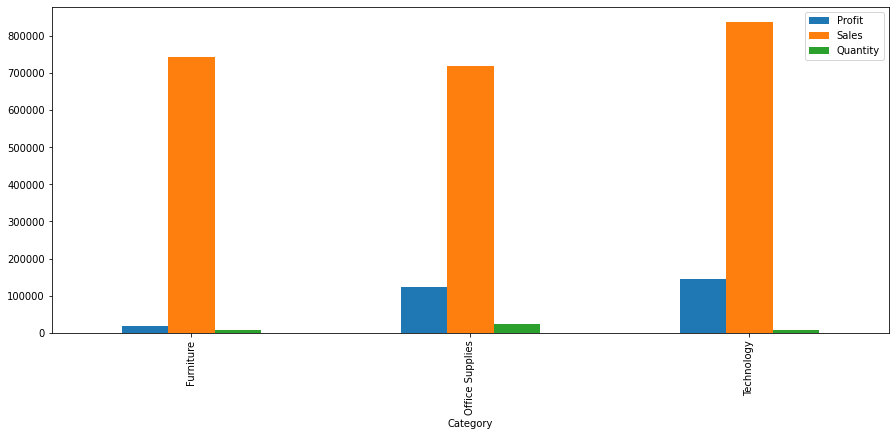

In [65]:
Sort_category.plot(x=	"Category", y=["Profit", "Sales", "Quantity"], kind="bar",figsize= (15,6))



*   Sales in technology and Office supplies products should be increased as it is more profitable.
*   Irrespective of good sales, selling furniture products making less profit.



In [23]:
Sort_subcategory= df_sample.groupby('Sub-Category', as_index=False)['Profit','Sales','Discount','Quantity'].sum()
Sort_subcategory.sort_values(['Profit'], axis=0,ascending= False)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Sub-Category,Profit,Sales,Discount,Quantity
6,Copiers,55617.8249,149528.0300,11.00,234
13,Phones,44515.7306,330007.0540,137.40,3289
0,Accessories,41936.6357,167380.3180,60.80,2976
12,Paper,34053.5693,78479.2060,102.60,5178
3,Binders,30221.7633,203412.7330,567.00,5974
5,Chairs,26590.1663,328449.1030,105.00,2356
14,Storage,21278.8264,223843.6080,63.20,3158
1,Appliances,18138.0054,107532.1610,77.60,1729
9,Furnishings,13059.1436,91705.1640,132.40,3563
7,Envelopes,6964.1767,16476.4020,20.40,906


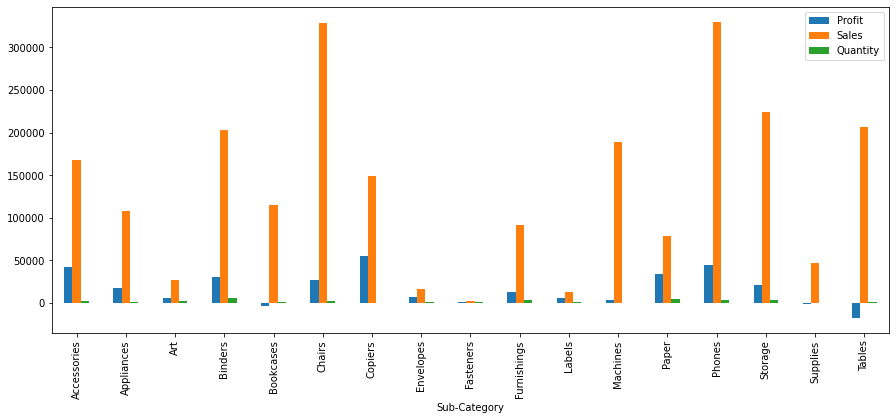

In [66]:
Sort_subcategory.plot(x=	"Sub-Category", y=["Profit", "Sales", "Quantity"], kind="bar",figsize= (15,6))



*   Sales of Copiers should increase as it is giving highest profit with almost no discount. 
*   Company must look into products such as Tables, Suppliers, Bookcases e.t.c which is in loss.

